# Jobs EDA

In [1]:
#Data and analysis
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from sklearn import preprocessing, linear_model, metrics

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize': 20,
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

### Load Jobs Data from csv

In [15]:
ds = pd.read_csv('./data/dsfinal2.csv')

In [17]:
ds.columns.unique()

Index(['Unnamed: 0', 'Unnamed: 0.1', 'city', 'job_title', 'company_name',
       'summary', 'salary_lower', 'salary_upper', 'mean_salary'],
      dtype='object')

In [19]:
ds.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [21]:
da = pd.read_csv('./data/datafinal2.csv')

In [23]:
da.columns.unique()

Index(['Unnamed: 0', 'city', 'job_title', 'company_name', 'summary',
       'salary_lower', 'salary_upper', 'mean_salary'],
      dtype='object')

In [24]:
da.drop(['Unnamed: 0'], axis=1, inplace=True)

In [29]:
da.head()

,city,job_title,company_name,summary,salary_lower,salary_upper,mean_salary
0,Sydney,Analyst,WEST 1 Australia,"Data organization, processing and interpretati...",55000.0,65000.0,60000.0
1,Sydney,Data Analyst,ANZ Banking Group,Our Data Analyst,70000.0,90000.0,80000.0
2,Sydney,Data Scientist,Domain Group,Prior experience creating beautiful data visua...,NaN,NaN,NaN
3,Sydney,Data Analyst,AMP Ltd,We are currently looking for two Data Analyst,70000.0,90000.0,80000.0
4,Sydney,Data Analyst,Amazon.com,As a Data Analyst,70000.0,90000.0,80000.0


### Combine the 2 Dataframe

In [38]:
job_df = pd.concat([ds,da])

In [39]:
job_df.dropna()

,city,job_title,company_name,summary,salary_lower,salary_upper,mean_salary
0,Sydney,Data Scientist,Domain Group,As a Data Scientist,82500.0,112500.0,97500.0
1,Sydney,Data Scientist,ANZ Banking Group,As the Data Scientist,82500.0,112500.0,97500.0
3,Sydney,Junior Data Scientist,Intellify,We also believe great Data Scientist,80000.0,100000.0,90000.0
4,Sydney,Junior Data Scientist,The Eclair Group,Industry experience as a Data Analyst or Junio...,70000.0,90000.0,80000.0
5,Sydney,Data Scientist,Investigations & Counter Terrorism,Data Scientist,82500.0,112500.0,97500.0
6,Sydney,Junior Data Scientist,Sirius People,Opportunity to start your career in Data Scien...,70000.0,90000.0,80000.0
7,Sydney,Data Scientist,DataRobot,Data Scientist,82500.0,112500.0,97500.0
8,Sydney,Data Scientist,Datasii,Experience as a Data Scientist,100000.0,115000.0,107500.0
9,Sydney,Data Scientist,Freelancer.com,Proven experience as a Data Scientist,65000.0,110000.0,87500.0
10,Sydney,Data Scientist,Freshwater Group,The Data Scientist,82500.0,112500.0,97500.0


In [40]:
job_df.shape

(658, 7)

In [41]:
job_df.isnull().sum()

city             0
job_title        0
company_name     0
summary          0
salary_lower    42
salary_upper    42
mean_salary     42
dtype: int64

In [45]:
job_df.dropna()

,city,job_title,company_name,summary,salary_lower,salary_upper,mean_salary
0,Sydney,Data Scientist,Domain Group,As a Data Scientist,82500.0,112500.0,97500.0
1,Sydney,Data Scientist,ANZ Banking Group,As the Data Scientist,82500.0,112500.0,97500.0
3,Sydney,Junior Data Scientist,Intellify,We also believe great Data Scientist,80000.0,100000.0,90000.0
4,Sydney,Junior Data Scientist,The Eclair Group,Industry experience as a Data Analyst or Junio...,70000.0,90000.0,80000.0
5,Sydney,Data Scientist,Investigations & Counter Terrorism,Data Scientist,82500.0,112500.0,97500.0
6,Sydney,Junior Data Scientist,Sirius People,Opportunity to start your career in Data Scien...,70000.0,90000.0,80000.0
7,Sydney,Data Scientist,DataRobot,Data Scientist,82500.0,112500.0,97500.0
8,Sydney,Data Scientist,Datasii,Experience as a Data Scientist,100000.0,115000.0,107500.0
9,Sydney,Data Scientist,Freelancer.com,Proven experience as a Data Scientist,65000.0,110000.0,87500.0
10,Sydney,Data Scientist,Freshwater Group,The Data Scientist,82500.0,112500.0,97500.0


In [91]:
job_df.salary_lower.unique()

array([ 82500.,     nan,  80000.,  70000., 100000.,  65000.,  60000.,
        55000.,    600.])

To make a meaningful analysis we have drop values and nan and filtered only Salary on the lower range greater or equal to 55K to make a meaningful analysis.

In [49]:
fjob_df = job_df[job_df.salary_lower >= 55000]

In [54]:
fjob_df.salary_lower.unique()

array([ 82500.,  80000.,  70000., 100000.,  65000.,  60000.,  55000.])

In [52]:
fjob_df.to_csv('./data/dsjob-salary.csv')

In [61]:
fjob_df.sample(50)

,city,job_title,company_name,summary,salary_lower,salary_upper,mean_salary
170,Sydney,Data Scientist,Investigations & Counter Terrorism,Data Scientist,82500.0,112500.0,97500.0
161,Hills District,Data Scientist,CPT Global,Strong experience working as a Data Scientist,82500.0,112500.0,97500.0
411,Sydney,Data Analyst,Munich Re,Data Analyst,70000.0,90000.0,80000.0
131,Macquarie Park,Data Scientist,CPT Global,Strong experience working as a Data Scientist,82500.0,112500.0,97500.0
43,Sydney,Data Analyst,Munich Re,Data Analyst,70000.0,90000.0,80000.0
297,Barangaroo,Data Analyst,Tata Consultancy Services (TCS),Data migration Test Analyst (Automation experi...,80000.0,90000.0,85000.0
273,Darlinghurst+NSW,Data Analyst,ANZ Banking Group,Our Data Analyst,70000.0,90000.0,80000.0
60,Barangaroo,Data Scientist,Domain Group,As a Data Scientist,82500.0,112500.0,97500.0
108,Parramatta,Junior Data Scientist,Intellify,We also believe great data science comes from ...,80000.0,100000.0,90000.0
64,Barangaroo,Junior Data Scientist,The Eclair Group,Industry experience as a Data Analyst or Junio...,70000.0,90000.0,80000.0


### Salary bands advertised, Lower, Upper and Mid Salary 

In [58]:
salary_lower_band = fjob_df['salary_lower'].value_counts()
salary_lower_band

70000.0     308
82500.0     112
80000.0      70
55000.0      56
65000.0      14
60000.0      14
100000.0     14
Name: salary_lower, dtype: int64

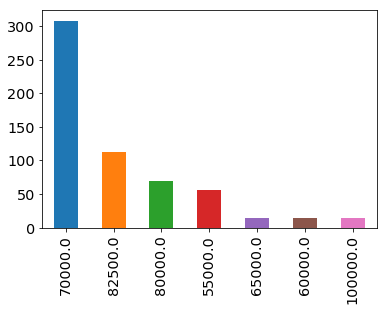

In [60]:
salary_lower_band.plot(kind='bar');

The plot showing that the highest band is on the 70K advertised on the Lower band of the salary advertised.  Among the Advertised role from Senior Data Scientist to an Analyts as the bottom the level of seniority of Job titles.  55K was the starting salary as an Analyst for the job advertised.

In [62]:
salary_upper_band = fjob_df['salary_upper'].value_counts()
salary_upper_band

90000.0     336
112500.0    112
65000.0      56
100000.0     42
115000.0     14
110000.0     14
85000.0      14
Name: salary_upper, dtype: int64

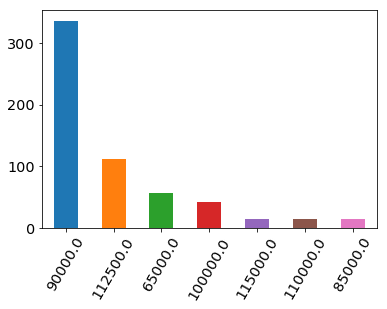

In [73]:
salary_upper_band.plot(kind='bar')
plt.xticks(rotation=60);

On the upper band of the Salary range the highest advertised salary are 90K, therefore a number of advertised jobs are willing to pay 90K for the advertised roles.  With the lowest at 65K and highest advertised as 115K.  2nd highest pay are 112K, based on the grouping of Job titles when cleaning and aggregating the data, 112K are the median for those roles that did not shows the advertised rate for the roles.

In [79]:
from IPython.display import Image


Looking at indeed.com salary range for a Data Analyst the data extracted from the website and analysed them the 90K range is pretty close to what indeed.com based on their data.

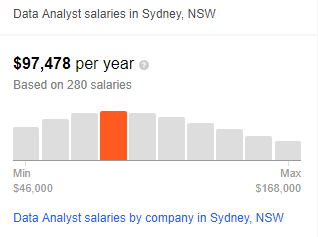

In [78]:

Image(filename='./data/salaryrange.png')


### Analyse Job Titles 

In [64]:
job_title = fjob_df['job_title'].value_counts()
job_title

Data Analyst             280
Data Scientist           140
Junior Data Scientist    112
Analyst                   56
Name: job_title, dtype: int64

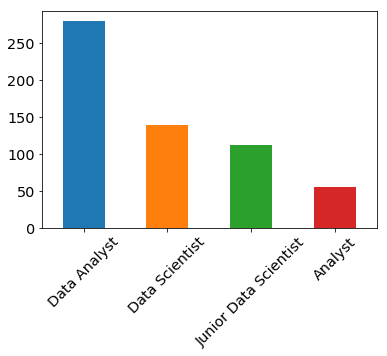

In [72]:
job_title.plot(kind='bar')
plt.xticks(rotation=45);


Data Analyst are the most advertised Roles almost double of Data Scientist, Data Analyst seems to be in high demand, where as Data Scientist are more specialised field and required more experience in the area of expertise.  Therefore is you're starting out in search of a role there are more chances of landing a Data Analyst role, however if you want to be the Data Scientist that you aspiring to be, then be more selective and go for the Junior Data Scientist, otherwise you'll be forever a Data Janitor as your career.

Note: It looks like Snr Data Scientist has been dropped from the data set, while dropping the NaN, most likely that it did not show salary range on the advertised role and while creating a Median Value based on their job title it cannot calculate the median and hence populated as 0 and then dropped from the dataset.  Otherwise we have to go back and populated them manually based on the average indeed.com post on their website.

Looking at the indeed.com salary, we seems to be missing the upper band salary for a Senior Data Scientist with the mean salary of just under the 150K range and the max range over the 250K range.  the data cleaning process has to be further investigated in the next process and rerun the EDA for a complete representation of the Job Title from Senior Data Scientist to Analyst roles.

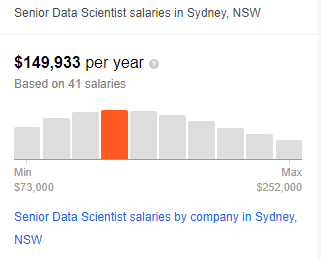

In [92]:
Image(filename='./data/snrdatascientist.png')

In [88]:
title_group = fjob_df.groupby(['job_title','mean_salary'])['mean_salary'].count()
title_group

job_title              mean_salary
Analyst                60000.0         56
Data Analyst           80000.0        252
                       85000.0         28
Data Scientist         87500.0         14
                       97500.0        112
                       107500.0        14
Junior Data Scientist  72500.0         14
                       80000.0         56
                       90000.0         42
Name: mean_salary, dtype: int64

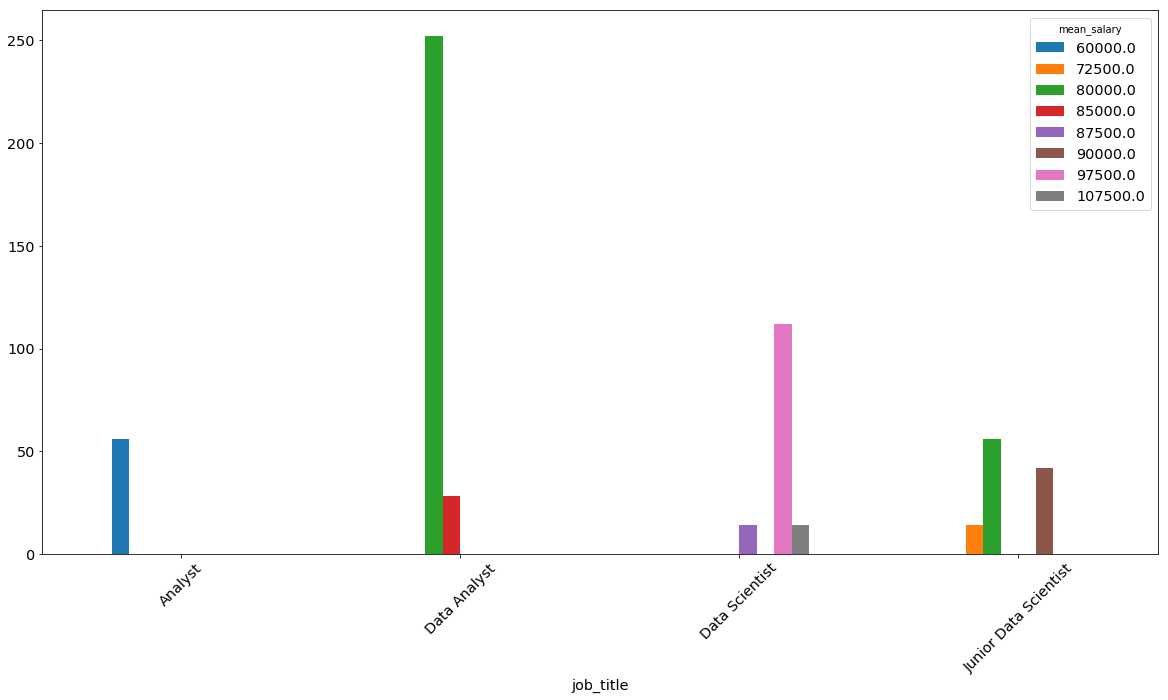

In [90]:
# see based on for each job title
title_group.unstack().plot(kind = 'bar', figsize=(20, 10))
plt.xticks(rotation=45);

### Companies and Agencies Roles Advertised

In [75]:
company_list = fjob_df['company_name'].value_counts()
company_list

Datasii                                         42
Sydney                                          42
ANZ Banking Group                               42
Intellify                                       42
The Eclair Group                                42
BT Financial Group                              28
AMP Ltd                                         28
World Fuel                                      28
Department of Finance, Services & Innovation    28
Munich Re                                       28
WEST 1 Australia                                28
OpenAgent                                       28
Amazon.com                                      28
Tata Consultancy Services (TCS)                 28
Freshwater Group                                14
DataRobot                                       14
Investigations & Counter Terrorism              14
Domain Group                                    14
HIVERY                                          14
Ikon                           

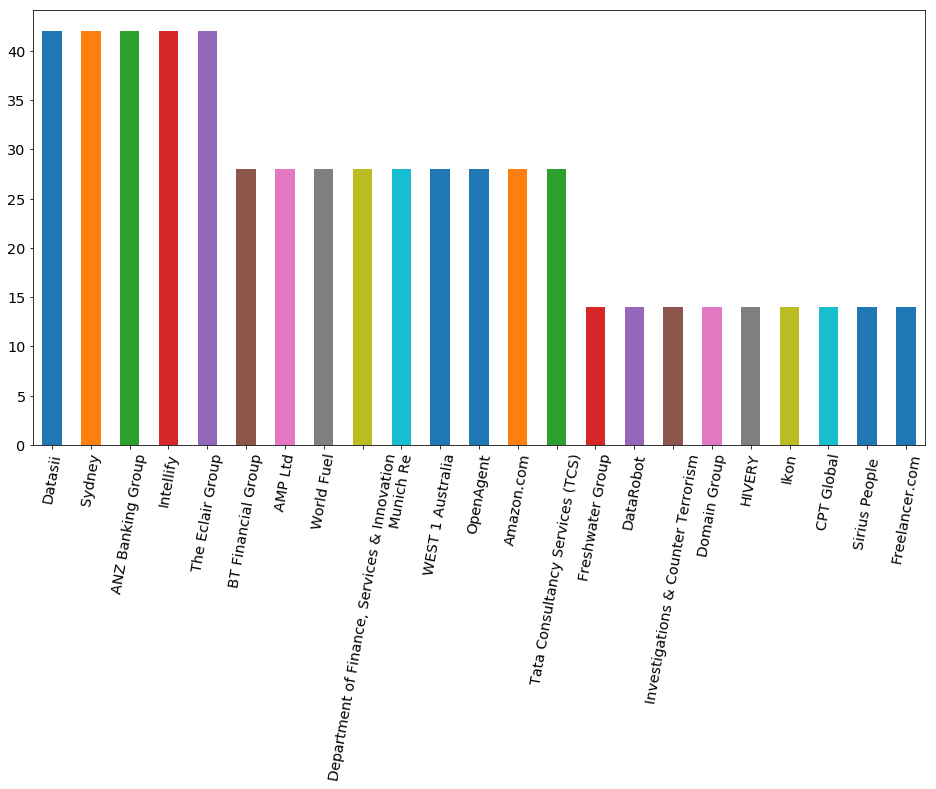

In [84]:
company_list.plot(kind='bar', figsize=(16,8))
plt.xticks(rotation=80);


From out data extract from indeed.com, there are 23 active company advertising Data Scientist to Analyst this week, I am sure this list will change week to week as we either extract on a daily or weekly basis and analyse the type of jobs they're posting.  This is just a snapshot of a day and if we also extract the posting dates we can also analyse if the job was a reposting, old advertising >30 days or a recent posting say a range we want to look at from 2 days or less, to check the reality of the job advertised compared to the actual job that actually exist in the market.  I did gone back and check on the data that for example Munich Re posted over 25 jobs, that doesn't mean that they have 25 opening in the  company, and it was listed in multiple locations on indeed, as far as I am aware they are Headquartered in Syd CBD.  This is kind of false advertising or false market outlook that that there are actually over 25 openings in a single company unless they're really expanding, who knows without checking into their company website at least to find the actual numbers.

3 Financial/Banking field advertising for the roles ANZ, BT (Part of Westpac) and AMP are actively looking and based on my prior assumptions as well the number of roles available probably doesn't actually exist to what they have been advertising.

If you would like to be a hero of Data Science, the job at Investigation and Counter Terrorism would be an interesting role with the Government.  You will be able to play the role of James Bond behind your screen and go save the world behind your desktop or your Mac laptop, and the safety and comfort of your air conditioned cubicle office, zipping your ice latte.

There's one Company Sydney, not sure how that came about during the data cleaning as some advertisers incorrectly label their Company as Sydney and we have no idea where they're from, but we'll keep them in the data set as they have advertised an open role in indeed.com.

## Convert  Categorical Variable into Dummy Variables

    Job title Category into Dummy Variables

In [96]:
job_title = pd.get_dummies(fjob_df['job_title'])

In [97]:
job_title.head()

,Analyst,Data Analyst,Data Scientist,Junior Data Scientist
0,0,0,1,0
1,0,0,1,0
3,0,0,0,1
4,0,0,0,1
5,0,0,1,0


In [98]:
# Join the dummy variables to the main dataframe
job_title_category = pd.concat([fjob_df, job_title], axis=1)
job_title_category.head()

,city,job_title,company_name,summary,salary_lower,salary_upper,mean_salary,Analyst,Data Analyst,Data Scientist,Junior Data Scientist
0,Sydney,Data Scientist,Domain Group,As a Data Scientist,82500.0,112500.0,97500.0,0,0,1,0
1,Sydney,Data Scientist,ANZ Banking Group,As the Data Scientist,82500.0,112500.0,97500.0,0,0,1,0
3,Sydney,Junior Data Scientist,Intellify,We also believe great Data Scientist,80000.0,100000.0,90000.0,0,0,0,1
4,Sydney,Junior Data Scientist,The Eclair Group,Industry experience as a Data Analyst or Junio...,70000.0,90000.0,80000.0,0,0,0,1
5,Sydney,Data Scientist,Investigations & Counter Terrorism,Data Scientist,82500.0,112500.0,97500.0,0,0,1,0


In [99]:
#save file for Analysis
job_title_category.to_csv('./data/jtitlecat.csv')

In [100]:
# save job title dummies file
job_title.to_csv('./data/jtitledummy.csv')